In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [10]:
%cd
%ls

/gdrive/MyDrive/Horror Excel/Progetto Covid Gruppo Horror/Analisi Margot 
'04 - Tasso di mortalità normalizzato per regione.py'       Dati-campione-2013-2023.csv
'05 - Grafico_Italia_Mappa_Incidenza_guariti.py'            Deceduti.png
'06 - Grafico_Italia_Mappa_Incidenza_Decessi.py'            Geo_Clean/
'07 - Grafico_Italia_Mappa_Incidenza_current_positive.py'   guariti.png
'17 - analisi_Italy vs ue.py'                               Mappa_inquinamento_regionale.png
'18 - Spunti Correlazione - Scuola.py'                      MappaProporzioneDecessi.png
 Campioni_Invalsi_clean.csv                                'Nuovi positivi.png'
 covid19_europe.csv                                         TOP25xprovincia.py


In [11]:
data = pd.read_csv("covid19_europe.csv", delimiter=';')

In [12]:
# conversione datetime
data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst=True)

In [13]:
# Aggiungo una colonna 'month_year' per facilitare l'aggregazione
data['month_year'] = data['dateRep'].dt.to_period('M')

In [14]:
# Aggrego i dati per mese e paese
casi_mensili = data.groupby(['month_year', 'countriesAndTerritories'])['cases'].sum().reset_index()

In [15]:
# Filtro
selezioni_paesi = ['Italy', 'Belgium', 'Spain', 'United_Kingdom', 'France']
filtro_casi = casi_mensili[casi_mensili['countriesAndTerritories'].isin(selezioni_paesi)]

In [ ]:
# conversione della data in stringa, ma da rivedere quest psg
filtro_casi['month_year_str'] = filtro_casi['month_year'].dt.strftime('%B')

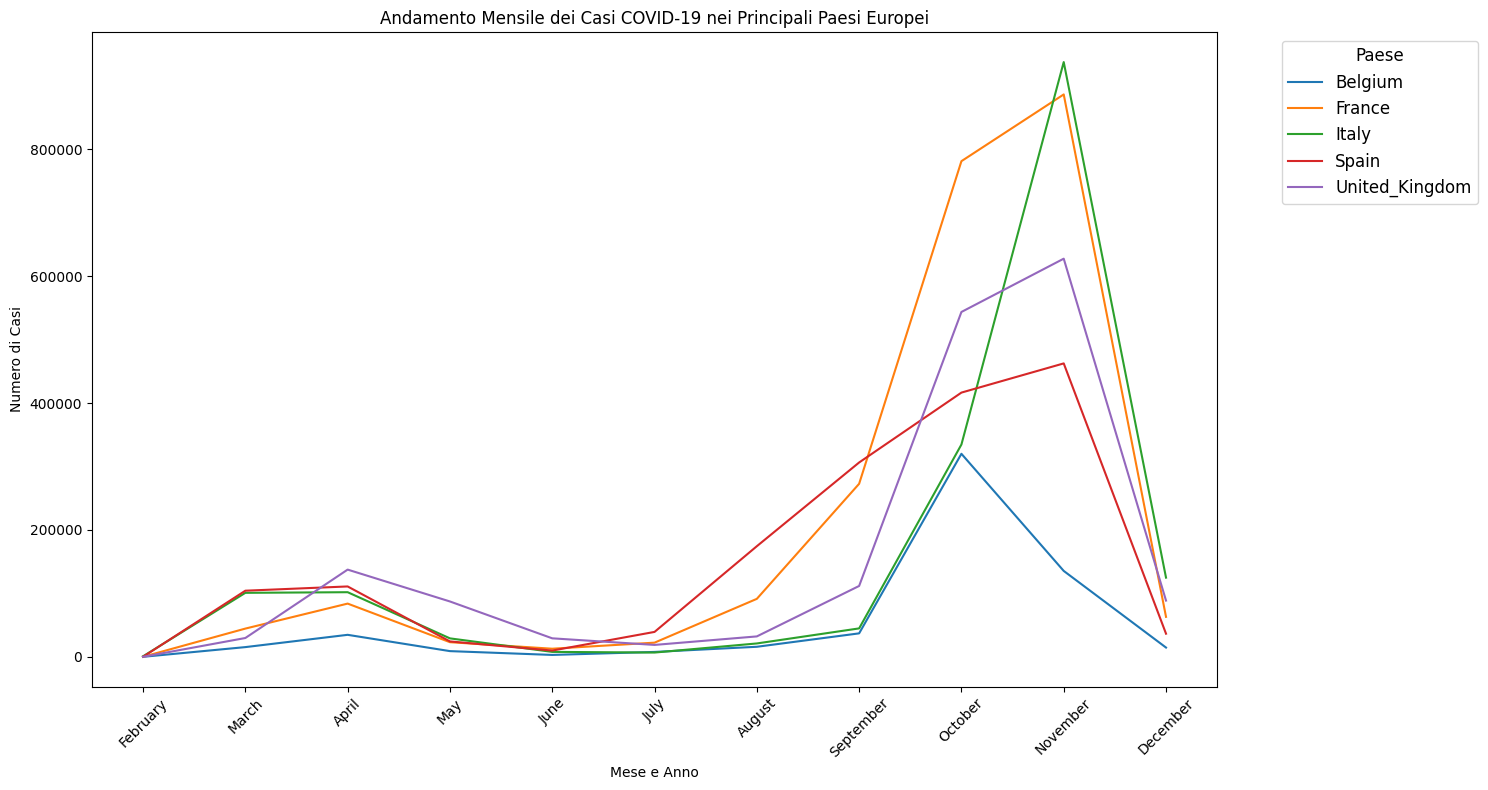

In [19]:
# Grafico
plt.figure(figsize=(15, 8))
sns.lineplot(data=filtro_casi, x='month_year_str', y='cases', hue='countriesAndTerritories')
plt.xticks(rotation=45)
plt.title('Andamento Mensile dei Casi COVID-19 nei Principali Paesi Europei')
plt.xlabel('Mese e Anno')
plt.ylabel('Numero di Casi')
plt.legend(title='Paese', title_fontsize='large', fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
